INDIAN START-UP FUNDING ANALYSIS (2018 - 2021)

Ideas, creativity, and execution are essential for a start-up to flourish. But are they enough? Investors provide start-ups and other entrepreneurial ventures with the capital popularly known as "funding"---to think big, grow rich, and leave a lasting impact. 

In this project, my intention is to analyse funding received by start-ups in India from 2018 to 2021. The data for each year of funding were gotten from 2 separate csv files (2018 and 2019) and from a database for years 2020 and 2021. In these files, the start-ups' details, the funding amounts received, the investors' and other relevant information were provided.

1. BUSINESS UNDERSTANDING

The main goal is to understand the objectives of the project from a business perspective and convert this knowledge into a data mining problem definition and a preliminary plan designed to achieve the objectives.

1.1 Determining Business Objectives

The primary objective is to identify the key factors that influence startup funding and predict future funding trends within the Indian startup ecosystem. This analysis is crucial for stakeholders such as startup founders, investors, policymakers, and industry analysts who rely on these insights to make informed decisions. 

1.2 Assess the Situation

In this phase, the current situation is assessed, considering resources, constraints, and risks. Resources include access to historical startup funding data from 2018 to 2021, data analysis tools like Python, Pandas, and Seaborn, and domain knowledge. Constraints may involve data quality issues, limited access to private funding data, and time constraints. Potential risks include incomplete or inaccurate data and changing market conditions affecting the predictions.

1.3 Define Data Mining Goals

My primary goals are to analyze historical funding data to uncover trends and patterns and build predictive models to forecast future funding trends. Secondary goals involve identifying the key factors influencing the likelihood and amount of funding startups receive.

1.4 Defining Hypothesis and Business Analysis Questions

1.4.1 Hypothesis

Null Hypothesis (H0): TThere is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

Alternative Hypothesis (H1): There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

1.4.2 Business Analysis Questions

1. Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.

2. Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime?

3. Identify the booming sectors withing the ecosystem and which top city serves as the industrial hub in India.

4. Determine the top investors within the startup ecosystem and identify the proportion of investment by the first 3 investors that have funded different sectors from 2018 - 2021.

5. Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.

2. DATA UNDERSTANDING

In the Data Understanding phase, my focus is on getting familiar with the data and identifying data quality issues. This phase involves collecting the initial data, describing it, exploring it, and verifying its quality.

2.1 Data Collection

I begin by collecting data from various sources like connecting to a public database with provided credentials saved in a .env format for datasets 2020 and 2021, from a Github repository in a CSV format (2019 dataset), and from a Onedrive account also in CSV format (2018 dataset). This data includes information about startup funding from 2018 to 2021.

2.2 Data Description

The collected data is loaded into Pandas DataFrames by importing the necessary libraries, and an initial inspection is performed to understand its structure and basic characteristics. This involves checking the data types, shape, unique values, the presence of missing and duplicated values, and getting an overview of the data using descriptive statistics.

In [8]:
# Importing relevant packages

import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

warnings.filterwarnings('ignore')

In [9]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials from .env file
database = environment_variables.get("database")
server = environment_variables.get("server")
login = environment_variables.get("login")
password = environment_variables.get("password")
 
# create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"

In [10]:
# Using the connect method of the pyodbc library to pass in the connection string
connection = pyodbc.connect(connection_string)

# what tables are in the Database
db_query = '''SELECT *
FROM INDIVIDUAL_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE'''

DATASET FOR 2021

In [11]:
# Querying the Database to determine the tables we are to use for analysis
query1 = "Select * from dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query1, connection)
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [12]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [13]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [14]:
data_2021.shape

(1209, 9)

DATASET FOR 2020

In [15]:
query2 = "Select * from dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query2, connection)
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [16]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [17]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [18]:
data_2020.shape

(1055, 10)

DATASET FOR 2019

In [19]:
# File path for the 2019 funding dataset
file_path2 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\LP1\\CA_First_Project_LP1\\Notebooks\\startup_funding2019.csv'

# Loading the file into the notebook for analysis
data_2019 = pd.read_csv(file_path2)
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [20]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [21]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [22]:
data_2019.shape

(89, 9)

DATASET FOR 2018

In [23]:
# File path for the 2018 funding dataset
file_path1 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\LP1\\CA_First_Project_LP1\\Notebooks\\startup_funding2018.csv'

# Loading the file into the notebook for analysis
data_2018 = pd.read_csv(file_path1)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [24]:
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [25]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [26]:
data_2018.shape

(526, 6)

3. DATA PREPARATION

In the Data Preparation phase, my focus is on preparing the data for analysis. This phase involves cleaning the data, handling missing values, and transforming the data into a suitable format for analysis.

3.1 Data Cleaning

Data cleaning involves handling missing values, correcting errors, and standardizing formats. For example, funding amounts may need to be converted from strings to numerical values.

Concerns with the Data
a. Columns from different years have different names that must be renamed to be the same for effective analysis

b. A year column must be added to all the dataframes to represent the year of investment. This is needed and important when the 4 tables are merged.

c. All Amounts columns need to be standardized to the same currency ($), and converted to the same datatype (float). All symbols and commas should be deleted and assume that Amount values without any currency signs are taken to be in Dollars.

d. All duplicated values in each table should be dropped.

e. All missing values should be filled with an appropriate value for each column


3.1.1 Cleaning Dataset 2018

In [27]:
# File path for the 2018 funding dataset
file_path1 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\LP1\\CA_First_Project_LP1\\Notebooks\\startup_funding2018.csv'

# Loading the file into the notebook for analysis
data_2018 = pd.read_csv(file_path1)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [28]:
# Checking for duplicate rows in the DataFrame

# Check for duplicate rows
duplicates1 = data_2018.duplicated()

# Count duplicate rows
num_duplicates1 = duplicates1.sum()
print(f"Number of duplicate rows: {num_duplicates1}")

Number of duplicate rows: 1


In [29]:
# Show all duplicated rows
data_2018[data_2018.duplicated(keep = False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [30]:
# Dropping duplicates
data_2018.drop_duplicates(inplace = True)

In [31]:
# Exploring and Cleaning the "Industry" column
data_2018['Industry'].value_counts()

Industry
—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: count, Length: 405, dtype: int64

In [32]:
# Checking the missing values in the 'Industry' column
data_2018[data_2018['Industry'] == '—']

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,"₹104,000,000","Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...
121,FLEECA,—,Seed,—,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,"$14,000,000","Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,Fric Bergen,—,Venture - Series Unknown,—,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...
174,Deftouch,—,Seed,—,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...
181,Corefactors,—,Seed,—,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ..."
210,Cell Propulsion,—,Seed,"₹7,000,000","Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...
230,Flathalt,—,Angel,50000,"Gurgaon, Haryana, India",FInd your Customized Home here.
235,dishq,—,Seed,400000,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...


In [33]:
# Replacing mising values with np.NaN
data_2018['Industry'] = data_2018['Industry'].replace('—', np.nan)

In [34]:
# Simplifying the 'Industry' column by splitting values with a comma delimiter, selecting only the first element from the resulting list of substrings. Then remove single quotes since they are strings
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0].str.replace("'", ",", regex = True)

In [35]:
# Checking 'Industry' column for values
data_2018['Industry'].value_counts()

Industry
Financial Services                    26
Health Care                           26
E-Commerce                            22
Apps                                  20
Automotive                            18
                                      ..
Business Intelligence                  1
Government                             1
Audio                                  1
Enterprise Resource Planning (ERP)     1
Eyewear                                1
Name: count, Length: 147, dtype: int64

In [36]:
# Sorting 'Industry' column alphabetically for irregularities
data_2018['Industry'].sort_values()

139    3D Printing
446     Accounting
422     Accounting
17      Accounting
81     Advertising
          ...     
473            NaN
476            NaN
478            NaN
480            NaN
510            NaN
Name: Industry, Length: 525, dtype: object

In [37]:
data_2018['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       nan, 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [38]:
# Checking for irregularities in values and company description
data_2018[data_2018['Industry'] == 'Wellness']

,Company Name,Industry,Round/Series,Amount,Location,About Company
66,MedCords,Wellness,Seed,"₹26,400,000","Pune, Maharashtra, India",Medcords is India’s first holistic healthcare ...


In [39]:
# Checking for irregularities in values and company description
data_2018[data_2018['Industry'] == 'Basketball']

,Company Name,Industry,Round/Series,Amount,Location,About Company
286,Sports Flashes Pvt. Ltd,Basketball,Seed,1000000,"New Delhi, Delhi, India",Sports Flashes operates a sports content app t...


In [40]:
data_2018[data_2018['Industry'] == 'Android']

,Company Name,Industry,Round/Series,Amount,Location,About Company
265,edureka!,Android,Series A,2000000,"Bangalore, Karnataka, India",Edureka is the fastest growing online learning...


In [41]:
# Fixing notable errors through observation and individual inspection
data_2018['Industry'].replace('Wellness', 'Health Care', inplace = True)
data_2018['Industry'].replace('Basketball', 'Apps', inplace = True)
data_2018['Industry'].replace('Cooking', 'Food Delivery', inplace = True)
data_2018['Industry'].replace('Catering', 'Food Delivery', inplace = True)
data_2018['Industry'].replace('Crowdsourcing', 'Crowdfunding', inplace = True)
data_2018['Industry'].replace('Android', 'E-Learning', inplace = True)

In [42]:
# Checking 'Amount' column for different values
data_2018['Amount'].value_counts()

Amount
—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: count, Length: 198, dtype: int64

In [43]:
data_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [44]:
# Checking for missing values in the 'Amount' column
data_2018[data_2018['Amount'] == '—'].head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
8,Freightwalla,Information Services,Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...
10,BizCrum Infotech Pvt. Ltd.,B2B,Seed,—,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces
11,Emojifi,Internet,Seed,—,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, st..."


In [45]:
# Replacing the missing values with np.NaN
data_2018['Amount'].replace('—', np.nan, inplace = True, regex = True)
data_2018['Amount'].replace("[, $]", " ", inplace = True, regex = True)

In [46]:
# Converting the Rupee (₹) values to Dollar ($) values by creating new columns to store RUP values and USD values.
## rsplit the 'Amount' using '₹' as the delimiter
data_2018['Amount(₹)'] = data_2018['Amount'].str.rsplit('₹', n = 2).str[1]

# Remove spaces
data_2018['Amount(₹)'] = data_2018['Amount(₹)'].str.replace(' ', '')

# Converting the ₹ values to float and fill any missing (NaN) values with 0
data_2018['Amount(₹)'] = data_2018['Amount(₹)'].apply(float).fillna(0)

# Converting the ₹ values to $ values at an average exchange rate in 2018 (₹1 = $0.0146)
data_2018['Amount($)'] = data_2018['Amount(₹)'] * 0.0146

In [47]:
# Checking the DataFrame to confirm if ₹ values have been converted to $ values 
data_2018.head(10)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Amount(₹),Amount($)
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",0.0,0.0
1,Happy Cow Dairy,Agriculture,Seed,₹40 000 000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,40000000.0,584000.0
2,MyLoanCare,Credit,Series A,₹65 000 000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,65000000.0,949000.0
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,0.0,0.0
4,Eunimart,E-Commerce Platforms,Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,0.0,0.0
5,Hasura,Cloud Infrastructure,Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,0.0,0.0
6,Tripshelf,Internet,Seed,₹16 000 000,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,16000000.0,233600.0
7,Hyperdata.IO,Market Research,Angel,₹50 000 000,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,50000000.0,730000.0
8,Freightwalla,Information Services,Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,0.0,0.0
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,0.0,0.0


In [48]:
# Replacing 0 values with np.NaN in the converted ₹ values
data_2018['Amount($)'] = data_2018['Amount($)'].replace(0, np.nan)

# Fill NaN values in the 'Amount($)' column with values in 'Amount' column
data_2018['Amount($)'] = data_2018['Amount($)'].fillna(data_2018['Amount'])

# Drop 'Amount' and 'Amount(₹)' columns
data_2018.drop(['Amount', 'Amount(₹)'], axis = 1, inplace = True) 

In [49]:
# Checking the new 'Amount($)' column
data_2018['Amount($)'].value_counts()

Amount($)
1000000       24
500000        13
2000000       12
730000.0       9
292000.0       8
              ..
2200000        1
1200000        1
 15 000        1
 1 041 000     1
35000000       1
Name: count, Length: 197, dtype: int64

In [50]:
# Checking data_2018 info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       495 non-null    object
 2   Round/Series   525 non-null    object
 3   Location       525 non-null    object
 4   About Company  525 non-null    object
 5   Amount($)      377 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


In [51]:
# Add a Year column for easy identification of Year 2018 data info
data_2018['Year'] = 2018
data_2018

,Company Name,Industry,Round/Series,Location,About Company,Amount($),Year
0,TheCollegeFever,Brand Marketing,Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000,2018
1,Happy Cow Dairy,Agriculture,Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,584000.0,2018
2,MyLoanCare,Credit,Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,949000.0,2018
3,PayMe India,Financial Services,Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000,2018
4,Eunimart,E-Commerce Platforms,Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",225000000,2018
522,Happyeasygo Group,Tourism,Series A,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN,2018
523,Mombay,Food and Beverage,Seed,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,7500,2018
524,Droni Tech,Information Technology,Seed,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,511000.0,2018


In [52]:
# Checking 'Location' column
data_2018['Location'].value_counts()

Location
Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

In [53]:
# Simplifying the 'Location' column
data_2018['Location'] = data_2018['Location'].str.split(',').str[0].str.replace("'", ",", regex = True)

In [54]:
# Checking unique values for the 'Location' column after simplifying
data_2018['Location'].unique()


array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [55]:
# Checking the 'Round/Series' Column
data_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [56]:
# Replacing missing/unknown values in the 'Round/Series' column with np.nan
data_2018['Round/Series'] = data_2018['Round/Series'].replace('Venture - Series Unknown', np.nan)

data_2018['Round/Series'] = data_2018['Round/Series'].replace('Undisclosed', np.nan)

data_2018['Round/Series'] = data_2018['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', np.nan)

In [57]:
# Checking the correction done on 'Round/Series' column
data_2018['Round/Series'].value_counts()

Round/Series
Seed                     279
Series A                  73
Angel                     37
Series B                  20
Series C                  16
Debt Financing            13
Private Equity            10
Corporate Round            8
Pre-Seed                   6
Series E                   5
Grant                      4
Series D                   3
Secondary Market           3
Post-IPO Equity            3
Post-IPO Debt              2
Non-equity Assistance      1
Series H                   1
Funding Round              1
Name: count, dtype: int64

In [58]:
# Renaming Columns to match other Datasets for consistency
data_2018.rename(columns = {
    'Company Name': 'Company_Name',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Amount($)': 'Funding_Amount($)',
    'Location': 'Location',
    'About Company': 'What_it_does'
}, inplace=True)

In [59]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       525 non-null    object
 1   Sector             495 non-null    object
 2   Stage              485 non-null    object
 3   Location           525 non-null    object
 4   What_it_does       525 non-null    object
 5   Funding_Amount($)  377 non-null    object
 6   Year               525 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


3.1.2 Cleaning Dataset 2019

In [60]:
# File path for the 2019 funding dataset
file_path2 = 'C:\\Users\\HP\\AzubiCA\\Career Accelerator\\LP1\\CA_First_Project_LP1\\Notebooks\\startup_funding2019.csv'

# Loading the file into the notebook for analysis
data_2019 = pd.read_csv(file_path2)
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [61]:
# Checking for duplicate rows in the DataFrame

# Check for duplicate rows
duplicates2 = data_2019.duplicated()

# Count duplicate rows
num_duplicates2 = duplicates2.sum()
print(f"Number of duplicate rows: {num_duplicates2}")

Number of duplicate rows: 0


In [62]:
# Checking the unique values for 'HeadQuarter' column
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [63]:
# Exploring and cleaning the 'HeadQuarter' column
data_2019['HeadQuarter'].value_counts()

HeadQuarter
Bangalore        21
Mumbai           12
Delhi            10
Noida             5
Gurugram          5
Chennai           4
Pune              2
Jaipur            2
Telangana         1
Ahmedabad         1
Haryana           1
Chandigarh        1
New Delhi         1
Surat             1
Uttar pradesh     1
Hyderabad         1
Rajasthan         1
Name: count, dtype: int64

In [64]:
# Checking the unique values in the 'Sector' column
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [65]:
# Fixing some spelling errors through observation and individual inspection
data_2019['Sector'].replace('Ecommerce', 'E-commerce', inplace = True)
data_2019['Sector'].replace('Food & tech', 'Foodtech', inplace = True)
data_2019['Sector'].replace('Food tech', 'E-Foodtech', inplace = True)

In [66]:
# Exploring and Cleaning the 'Sector' column
data_2019['Sector'].value_counts()

Sector
Edtech                          7
Fintech                         5
Technology                      4
SaaS                            4
E-commerce                      4
AgriTech                        4
Logistics                       3
Automobile                      3
Foodtech                        3
Automotive tech                 2
Accomodation                    2
Food                            2
E-marketplace                   2
IoT                             2
AI                              2
Legal tech                      1
Mutual Funds                    1
Cybersecurity                   1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospitality                     1
Automobile & Technology         1
Games  

In [67]:
# Dropping 'Founded' and 'Founders' columns since they are not needed in my analysis but I would keep the 'Investor' column
data_2019.drop(['Founded', 'Founders'], axis = 1, inplace = True)

In [68]:
# Add a Year column for easy identification of Year 2019 data info
data_2019['Year'] = 2019
data_2019 

,Company/Brand,HeadQuarter,Sector,What it does,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,E-commerce,Provides a range of male grooming products,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019
...,...,...,...,...,...,...,...,...
84,Infra.Market,Mumbai,Infratech,It connects client requirements to their suppl...,"Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,2019
85,Oyo,Gurugram,Hospitality,Provides rooms for comfortable stay,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,2019
86,GoMechanic,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,Sequoia Capital,"$5,000,000",Series B,2019
87,Spinny,Delhi,Automobile,Online car retailer,"Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,2019


In [69]:
# Checking 'Amount' column for different values
data_2019['Amount($)'].value_counts()

Amount($)
Undisclosed     12
$5,000,000       6
$1,500,000       4
$6,000,000       4
$1,000,000       4
$30,000,000      3
$20,000,000      3
$50,000,000      3
$4,000,000       3
$5,500,000       3
$26,000,000      2
$2,000,000       2
$12,000,000      2
$100,000         2
$5,700,000       1
$693,000,000     1
$4,800,000       1
$120,000,000     1
$311,000,000     1
$6,800,000       1
$36,000,000      1
$2,800,000       1
$220,000         1
$600,000         1
$7,000,000       1
$2,100,000       1
$70,000,000      1
$60,000,000      1
$8,000,000       1
$25,000,000      1
$6,300,000       1
$100,000,000     1
$11,000,000      1
$28,000,000      1
$275,000,000     1
$22,000,000      1
$140,500         1
$540,000,000     1
$15,000,000      1
$182,700         1
$15,500,000      1
$400,000         1
$2,500,000       1
$140,000         1
$230,000,000     1
$49,400,000      1
$32,000,000      1
$150,000,000     1
$150,000         1
$33,000,000      1
Name: count, dtype: int64

In [70]:
# Replacing the Undisclosed values in the 'Amount' column with np.nan
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

# Removing the $ sign
data_2019['Amount($)'].replace("[, $]", " ", inplace = True, regex = True)

# Removing spaces
data_2019['Amount($)'] = data_2019['Amount($)'].str.replace(' ', '')

data_2019['Amount($)'].value_counts()

Amount($)
5000000      6
1500000      4
6000000      4
1000000      4
30000000     3
20000000     3
50000000     3
4000000      3
5500000      3
26000000     2
2000000      2
12000000     2
100000       2
5700000      1
693000000    1
4800000      1
120000000    1
311000000    1
6800000      1
36000000     1
2800000      1
220000       1
600000       1
7000000      1
2100000      1
70000000     1
60000000     1
8000000      1
25000000     1
6300000      1
100000000    1
11000000     1
28000000     1
275000000    1
22000000     1
140500       1
540000000    1
15000000     1
182700       1
15500000     1
400000       1
2500000      1
140000       1
230000000    1
49400000     1
32000000     1
150000000    1
150000       1
33000000     1
Name: count, dtype: int64

In [71]:
# Checking 'Stage' column for unique values
data_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [72]:
# Checking 'Stage' column for different values
data_2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [73]:
# Fixing some errors noticed through observation
data_2019['Stage'].replace('Pre-series A', 'Pre series A', inplace = True)
data_2019['Stage'].replace('Seed fund', 'Seed', inplace = True)
data_2019['Stage'].replace('Seed funding', 'Seed', inplace = True)
data_2019['Stage'].replace('Seed round', 'Seed', inplace = True)

In [74]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   HeadQuarter    70 non-null     object
 2   Sector         84 non-null     object
 3   What it does   89 non-null     object
 4   Investor       89 non-null     object
 5   Amount($)      77 non-null     object
 6   Stage          43 non-null     object
 7   Year           89 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 5.7+ KB


In [76]:
# Renaming Columns to match other Datasets for consistency
data_2019.rename(columns = {
    'Company/Brand': 'Company_Name',
    'HeadQuarter': 'Location',
    'What it does': 'What_it_does',
    'Amount($)': 'Funding_Amount($)'
}, inplace=True)

In [77]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       89 non-null     object
 1   Location           70 non-null     object
 2   Sector             84 non-null     object
 3   What_it_does       89 non-null     object
 4   Investor           89 non-null     object
 5   Funding_Amount($)  77 non-null     object
 6   Stage              43 non-null     object
 7   Year               89 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 5.7+ KB


3.1.3 Cleaning Dataset 2020

In [78]:
query2 = "Select * from dbo.LP1_startup_funding2020"

data_2020 = pd.read_sql(query2, connection)
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [79]:
# Checking for duplicate rows in the DataFrame

# Check for duplicate rows
duplicates = data_2020.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 3


In [80]:
# Viewing the duplicated rows
data_2020[data_2020.duplicated(keep = False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [81]:
# Dropping duplicated rows
data_2020.drop_duplicates(inplace = True)

In [82]:
# Dropping 'Founded' and 'Founders' columns since they are not needed in my analysis but I would keep the 'Investor' column
data_2020.drop(['Founded', 'Founders'], axis = 1, inplace = True)

In [83]:
# Dropping 'column10' column since the column has just 2 non-null values
data_2020.drop(['column10'], axis = 1, inplace = True)

In [84]:
# Add a Year column for easy identification of Year 2020 data info
data_2020['Year'] = 2020
data_2020

,Company_Brand,HeadQuarter,Sector,What_it_does,Investor,Amount,Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,Angel investors,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Venture Center,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,AI enabled marketplace that provides career gu...,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,None,Fintech,It offers customers with a single interface fo...,"Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,Verlinvest,8000000.0,None,2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,SIG Global India Fund LLP.,8043000.0,Series C,2020


In [85]:
# Renaming Columns to match other Datasets for consistency
data_2020.rename(columns = {
    'Company_Brand': 'Company_Name',
    'HeadQuarter': 'Location',
    'Amount': 'Funding_Amount($)'
}, inplace=True)

In [86]:
# Checking DataFrame to determine if Column name changes have occured
data_2020

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,Angel investors,200000.0,None,2020
1,Krayonnz,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Venture Center,NaN,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Siana Capital Management, Info Edge",340000.0,None,2020
...,...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,AI enabled marketplace that provides career gu...,"DSG Consumer Partners, Blume Ventures",1500000.0,None,2020
1051,EpiFi,None,Fintech,It offers customers with a single interface fo...,"Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,Verlinvest,8000000.0,None,2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,SIG Global India Fund LLP.,8043000.0,Series C,2020


In [87]:
# Checking the 'Location' column for irregularities
data_2020['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [88]:
data_2020['Location'].value_counts()

Location
Bangalore                                                   316
Mumbai                                                      164
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
                                                           ... 
Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom      1
Shanghai, China                                               1
Jiaxing, Zhejiang, China                                      1
Rajastan                                                      1
Sydney, New South Wales, Australia                            1
Name: count, Length: 77, dtype: int64

In [89]:
# Simplfying some of the values in the 'Location'column by splitting values with a comma, then select only the first element from the resulting list of substrings
data_2020['Location'] = data_2020['Location'].str.split(',').str[0].str.replace("'", " ", regex = True)

In [90]:
# Checking if simplification has been committed
data_2020['Location'].value_counts()

Location
Bangalore              316
Mumbai                 164
Gurugram                79
Delhi                   62
Chennai                 43
                      ... 
Newcastle Upon Tyne      1
Shanghai                 1
Jiaxing                  1
Rajastan                 1
Dehradun                 1
Name: count, Length: 71, dtype: int64

In [91]:
# Fixing some errors detected while inspecting and observing unique values in the 'Location' column
data_2020['Location'].replace('Banglore', 'Bangalore', inplace = True)
data_2020['Location'].replace('Hyderebad', 'Hyderabad', inplace = True)
data_2020['Location'].replace('San Franciscao', 'San Francisco', inplace = True)
data_2020['Location'].replace('San Francisco Bay Area', 'San Francisco', inplace = True)

In [92]:
# Checking 'Sector' column for irregularities
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [93]:
data_2020['Sector'].value_counts()

Sector
Fintech                  80
Edtech                   67
FinTech                  51
EdTech                   39
E-commerce               33
                         ..
Jewellery                 1
AR startup                1
HR Tech startup           1
Automotive Startup        1
Automobile Technology     1
Name: count, Length: 302, dtype: int64

In [94]:
# Checking 'Sector' column values a bit closer upon investigation
data_2020[data_2020['Sector'] == 'Supply chain, Agritech']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
705,Intello Labs,Gurugram,"Supply chain, Agritech",Standardisation and Quality control of fruits ...,Saama Capital,5900000.0,Series A,2020


In [95]:
# Replacing the 'Supply chain' with 'AgriTech
data_2020['Sector'].replace('Supply chain, Agritech', 'AgriTech', inplace = True)

# Other errors noticed in the 'Sector' column will be treated upon merged data of all 4 datasets

In [96]:
# Checking values in 'Funding_Amount($)' column
# Change the 'Funding_Amount($) to a str dtype'
data_2020['Funding_Amount($)'] = data_2020['Funding_Amount($)'].astype(str)
data_2020['Funding_Amount($)'].value_counts()

Funding_Amount($)
nan           253
1000000.0      53
2000000.0      39
3000000.0      27
5000000.0      24
             ... 
2879000.0       1
26500000.0      1
351000.0        1
46761000.0      1
8043000.0       1
Name: count, Length: 301, dtype: int64

In [97]:
# Replacing values with np.nan
data_2020['Funding_Amount($)'].replace('nan', np.nan, inplace = True, regex = True)

In [98]:
# Checking 'Stage' column for irregularities
data_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [99]:
data_2020['Stage'].value_counts()

Stage
Series A                 96
Seed                     79
Seed Round               69
Series B                 57
Pre series A             54
Pre-series A             53
Series C                 50
Series D                 22
Debt                     18
Pre Series A             12
Pre-seed                 11
Seed round                9
Series E                  6
Bridge                    6
Series F                  4
Pre-series B              4
Angel Round               4
Pre seed round            4
Pre-seed Round            2
Pre series B              2
Pre-Seed                  2
Seed Funding              2
Series B2                 2
Pre-series C              2
Seed funding              2
Pre-Series B              2
Seed Round & Series A     1
Series C, D               1
Mid series                1
Series D1                 1
Seed Investment           1
Pre series C              1
Pre-series                1
Bridge Round              1
Series H                  1
Seed A        

In [100]:
# Fixing some errors and re-categorizing some of the Stage values
data_2020['Stage'].replace('Bridge Round', 'Bridge', inplace = True)
data_2020['Stage'].replace('Pre seed round', 'Pre seed Round', inplace = True)
data_2020['Stage'].replace('Pre series A', 'Pre Series A', inplace = True)
data_2020['Stage'].replace('Pre- series A', 'Pre Series A', inplace = True)
data_2020['Stage'].replace('Pre-seed', 'Pre-Seed', inplace = True)
data_2020['Stage'].replace('Pre-series A', 'Pre Series A', inplace = True)
data_2020['Stage'].replace('Pre series B', 'Pre Series B', inplace = True)
data_2020['Stage'].replace('Pre-series B', 'Pre Series B', inplace = True)
data_2020['Stage'].replace('Pre-Series B', 'Pre Series B', inplace = True)
data_2020['Stage'].replace('Pre series C', 'Pre Series C', inplace = True)
data_2020['Stage'].replace('Pre-series C', 'Pre Series C', inplace = True)
data_2020['Stage'].replace('Seed A', 'Seed', inplace = True)
data_2020['Stage'].replace('Seed Funding', 'Seed', inplace = True)
data_2020['Stage'].replace('Seed round', 'Seed', inplace = True)
data_2020['Stage'].replace('Seed Round', 'Seed', inplace = True)
data_2020['Stage'].replace('Seed funding', 'Seed', inplace = True)
data_2020['Stage'].replace('Seed Investment', 'Seed', inplace = True)

In [101]:
# Confirm changes in the 'Stage' column
data_2020['Stage'].value_counts()

Stage
Seed                     163
Pre Series A             120
Series A                  96
Series B                  57
Series C                  50
Series D                  22
Debt                      18
Pre-Seed                  13
Pre Series B               8
Bridge                     7
Series E                   6
Pre seed Round             5
Angel Round                4
Series F                   4
Pre Series C               3
Pre-seed Round             2
Series B2                  2
Series A-1                 1
Series H                   1
Seed Round & Series A      1
Edge                       1
Pre-series                 1
Pre series A1              1
Series E2                  1
Series D1                  1
Mid series                 1
Series C, D                1
Name: count, dtype: int64

In [102]:
# Checking the dataset 2020 after cleaning some columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       1052 non-null   object
 1   Location           958 non-null    object
 2   Sector             1039 non-null   object
 3   What_it_does       1052 non-null   object
 4   Investor           1014 non-null   object
 5   Funding_Amount($)  799 non-null    object
 6   Stage              590 non-null    object
 7   Year               1052 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 74.0+ KB


3.1.4 Cleaning Dataset 2021

In [103]:
# Querying the Database to determine the tables we are to use for analysis
query1 = "Select * from dbo.LP1_startup_funding2021"

data_2021 = pd.read_sql(query1, connection)
data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [104]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [105]:
# Checking for duplicate rows in the DataFrame

# Check for duplicate rows
duplicates1 = data_2021.duplicated()

# Count duplicate rows
num_duplicates1 = duplicates1.sum()
print(f"Number of duplicate rows: {num_duplicates1}")

Number of duplicate rows: 19


In [106]:
# Viewing the duplicated rows
data_2021[data_2021.duplicated(keep = False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
94,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
96,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
104,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
106,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None


In [107]:
# Dropping duplicated rows
data_2021.drop_duplicates(inplace = True)

In [108]:
# Dropping 'Founded' and 'Founders' columns since they are not needed in my analysis but I would keep the 'Investor' column
data_2021.drop(['Founded', 'Founders'], axis = 1, inplace = True)

In [109]:
# Add a Year column for easy identification of Year 2021 data info
data_2021['Year'] = 2021
data_2021

,Company_Brand,HeadQuarter,Sector,What_it_does,Investor,Amount,Stage,Year
0,Unbox Robotics,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021
...,...,...,...,...,...,...,...,...
1204,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,Endiya Partners,$3000000,Pre-series A,2021
1205,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,IIFL AMC,$20000000,Series D,2021
1206,Leap Finance,Bangalore,Financial Services,International education loans for high potenti...,Owl Ventures,$55000000,Series C,2021
1207,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...","Winter Capital, ETS, Man Capital",$26000000,Series B,2021


In [110]:
# Renaming Columns to match other Datasets for consistency
data_2021.rename(columns = {
    'Company_Brand': 'Company_Name',
    'HeadQuarter': 'Location',
    'Amount': 'Funding_Amount($)'
}, inplace=True)

In [111]:
# Checking the DataFrame info to confirm chaning of column names
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       1190 non-null   object
 1   Location           1189 non-null   object
 2   Sector             1190 non-null   object
 3   What_it_does       1190 non-null   object
 4   Investor           1129 non-null   object
 5   Funding_Amount($)  1187 non-null   object
 6   Stage              769 non-null    object
 7   Year               1190 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 83.7+ KB


In [112]:
# Checking the 'Location' column for irregularities
data_2021['Location'].value_counts()

Location
Bangalore             421
Mumbai                198
Gurugram              154
New Delhi             142
Pune                   46
                     ... 
Thiruvananthapuram      1
Faridabad               1
Roorkee                 1
Ambernath               1
Gandhinagar             1
Name: count, Length: 70, dtype: int64

In [113]:
data_2021['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [114]:
# Investigating some of the errors detetced in the 'Location'column
data_2021[data_2021['Location'] == 'Computer Games']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
98,FanPlay,Computer Games,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [115]:
data_2021[data_2021['Location'] == 'Food & Beverages']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
241,MasterChow,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,WEH Ventures,$461000,Seed,2021


In [116]:
data_2021[data_2021['Location'] == 'Pharmaceuticals\t#REF!']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
242,Fullife Healthcare,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,$22000000,Series C,None,2021


In [117]:
data_2021[data_2021['Location'] == 'Gurugram\t#REF!']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
257,MoEVing,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain",$5000000,Seed,None,2021


In [118]:
data_2021[data_2021['Location'] == 'Information Technology & Services']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
1176,Peak,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,SoftBank Vision Fund 2,$75000000,Series C,2021


In [119]:
data_2021[data_2021['Location'] == 'Online Media\t#REF!']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
1100,Sochcast,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",$Undisclosed,None,None,2021


In [120]:
# Fixing detected errors in the 'Location'column
data_2021['Location'].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh', inplace = True)
data_2021['Location'].replace('Faridabad, Haryana', 'Faridabad', inplace = True)
data_2021['Location'].replace('Mountain View, CA', 'California', inplace = True)
data_2021['Location'].replace('Online Media\t#REF!', np.nan, inplace = True)
data_2021['Location'].replace('Information Technology & Services', 'Manchester', inplace = True)
data_2021['Location'].replace('Gurugram\t#REF!', 'Gurugram', inplace = True)
data_2021['Location'].replace('Pharmaceuticals\t#REF!', np.nan, inplace = True)
data_2021['Location'].replace('Food & Beverages', np.nan, inplace = True)
data_2021['Location'].replace('Computer Games', np.nan, inplace = True)

In [121]:
# Checking the 'Sector' column
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [122]:
data_2021['Sector'].value_counts()

Sector
FinTech                  121
EdTech                   102
Financial Services        59
E-commerce                37
Food & Beverages          36
                        ... 
Home Decor                 1
TaaS startup               1
Beverages                  1
Manufacturing startup      1
Staffing & Recruiting      1
Name: count, Length: 254, dtype: int64

Errors noted in the 'Sector' column will be treated when all 4 datasets are merged together.

In [123]:
# Checking the 'Funding_Amount($)' column for irregularities
data_2021['Funding_Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [124]:
data_2021['Funding_Amount($)'].value_counts()

Funding_Amount($)
$Undisclosed    72
$1000000        50
Undisclosed     43
$2000000        40
$1,000,000      33
                ..
$18,000,000      1
$5,200,000       1
$1,400,000       1
$900,000         1
$55000000        1
Name: count, Length: 278, dtype: int64

In [125]:
# Replacing values and correcting some errors
data_2021['Funding_Amount($)'].replace("[, $J]", " ", inplace = True, regex = True)

# Removing spaces
data_2021['Funding_Amount($)'] = data_2021['Funding_Amount($)'].str.replace(' ', '')

In [126]:
# Checking the 'Funding_Amount' column again
data_2021['Funding_Amount($)'].value_counts()

Funding_Amount($)
Undisclosed    115
1000000         83
2000000         60
3000000         48
10000000        43
              ... 
67000000         1
36000000         1
Upsparks         1
720000           1
55000000         1
Name: count, Length: 206, dtype: int64

In [127]:
data_2021['Funding_Amount($)'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '35000000', '140000000', '4000000',
       '13000000', None, '9500000', '8000000', 'Upsparks', '12000000',
       '1700000', '150000000', '100000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '370

In [128]:
# Checking 'Funding_Amount($)' column closely
data_2021[data_2021['Funding_Amount($)'] == 'ITOAngelNetworkLetsVenture']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
551,BHyve,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,"Omkar Pandharkame, Ketaki Ogale",ITOAngelNetworkLetsVenture,$300000,2021
677,Saarthi Pedagogy,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Sushil Agarwal,ITOAngelNetworkLetsVenture,$1000000,2021


In [129]:
# Replacing rows in the 'Funding_Amount($)' column detected above
data_2021.at[551, 'Funding_Amount($)'] = '300000'
data_2021.at[677, 'Funding_Amount($)'] = '1000000'

In [130]:
# Defining a function to swap values within 2 columns of the dataset

def swap(df, index, column1, column2):
    # Get values of the two columns for the specific index
    value1 = df.at[index, column1]
    value2 = df.at[index, column2]

    # Swap the values
    df.at[index, column1] = value2
    df.at[index, column2] = value1

In [131]:
# Taking a closer look into the 'Funding_Amount($)' column for values to swap with the function above
data_2021[data_2021['Funding_Amount($)'] == 'Pre-seriesA']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
545,AdmitKard,Noida,EdTech,A tech solution for end to end career advisory...,$1000000,Pre-seriesA,None,2021


In [132]:
# Swapping values for index 545
swap(data_2021, 545, 'Funding_Amount($)', 'Stage')

In [133]:
data_2021[data_2021['Funding_Amount($)'] == 'Seed']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
257,MoEVing,Gurugram,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain",$5000000,Seed,None,2021
1148,Godamwale,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,1000000\t#REF!,Seed,None,2021


In [134]:
swap(data_2021, 257, 'Funding_Amount($)', 'Stage')
swap(data_2021, 1148, 'Funding_Amount($)', 'Stage')

In [135]:
swap(data_2021, 257, 'Funding_Amount($)', 'Investor')
swap(data_2021, 1148, 'Funding_Amount($)', 'Investor')
swap(data_2021, 545, 'Funding_Amount($)', 'Investor')

In [136]:
data_2021['Funding_Amount($)'].replace('$5000000', '5000000', inplace = True)
data_2021['Funding_Amount($)'].replace('1000000\t#REF!', '1000000', inplace = True)
data_2021['Funding_Amount($)'].replace('$1000000', '1000000', inplace = True)

In [137]:
data_2021[data_2021['Funding_Amount($)'] == 'SeriesC']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
242,Fullife Healthcare,NaN,Primary Business is Development and Manufactur...,Varun Khanna,$22000000,SeriesC,None,2021


In [138]:
swap(data_2021, 242, 'Funding_Amount($)', 'Stage')
swap(data_2021, 242, 'Funding_Amount($)', 'Investor')
data_2021['Funding_Amount($)'].replace('$22000000', '22000000', inplace = True)

In [139]:
data_2021[data_2021['Funding_Amount($)'] == 'Upsparks']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
98,FanPlay,NaN,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [140]:
swap(data_2021, 98, 'Funding_Amount($)', 'Stage')
data_2021['Funding_Amount($)'].replace('$1200000', '1200000', inplace = True)

In [141]:
data_2021[data_2021['Funding_Amount($)'] == 'ah!Ventures']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
538,Little Leap,New Delhi,EdTech,Soft Skills that make Smart Leaders,Vishal Gupta,ah!Ventures,$300000,2021


In [142]:
swap(data_2021, 538, 'Funding_Amount($)', 'Stage')
data_2021['Funding_Amount($)'].replace('$300000', '300000', inplace = True)

In [143]:
# Replacing values with np.nan
data_2021['Funding_Amount($)'].replace(' ', np.nan, inplace = True, regex = True)
data_2021['Funding_Amount($)'].replace('undisclosed', np.nan, inplace = True, regex = True)
data_2021['Funding_Amount($)'].replace('Undisclosed', np.nan, inplace = True, regex = True)

In [144]:
# Confirming changes made in the 'Funding_Amount($)' column
data_2021['Funding_Amount($)'].value_counts()

Funding_Amount($)
1000000     86
2000000     60
3000000     48
10000000    43
5000000     42
            ..
10200000     1
67000000     1
36000000     1
720000       1
55000000     1
Name: count, Length: 198, dtype: int64

In [145]:
data_2021['Funding_Amount($)'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', None, '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '

In [146]:
# Checking 'Stage' column
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+', 'SeriesC',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'ah!Ventures', 'Pre-seriesA', '$300000',
       'Early seed', 'Series D1', '$6000000', '$1000000', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [147]:
data_2021['Stage'].value_counts()

Stage
Seed             243
Pre-series A     154
Series A         125
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          17
Pre-series B      10
Series F           6
Pre-series A1      4
Series G           2
Pre-series         2
Series H           2
Bridge             2
SeriesC            1
Upsparks           1
Series A2          1
Series F2          1
Seies A            1
$1000000           1
$6000000           1
Series D1          1
Early seed         1
$300000            1
Pre-seriesA        1
ah!Ventures        1
Seed+              1
Series F1          1
PE                 1
Series B3          1
Series A+          1
Series I           1
Name: count, dtype: int64

In [148]:
# Replacing values in the 'Stage' column
data_2021['Stage'].replace("[$]", "", inplace = True, regex = True)

In [149]:
data_2021['Stage'].value_counts()

Stage
Seed             243
Pre-series A     154
Series A         125
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          17
Pre-series B      10
Series F           6
Pre-series A1      4
Series G           2
Pre-series         2
Series H           2
Bridge             2
SeriesC            1
Upsparks           1
Series A2          1
Series F2          1
Seies A            1
1000000            1
6000000            1
Series D1          1
Early seed         1
300000             1
Pre-seriesA        1
ah!Ventures        1
Seed+              1
Series F1          1
PE                 1
Series B3          1
Series A+          1
Series I           1
Name: count, dtype: int64

In [175]:
# Checking the 'Stage' column closely
data_2021[data_2021['Stage'] == '300000']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
551,BHyve,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,"Omkar Pandharkame, Ketaki Ogale",300000,300000,2021


In [176]:
data_2021['Stage'].replace('300000', np.nan, inplace = True)

In [177]:
data_2021[data_2021['Stage'] == '1000000']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
677,Saarthi Pedagogy,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Sushil Agarwal,1000000,1000000,2021


In [178]:
data_2021['Stage'].replace('1000000', np.nan, inplace = True)

In [202]:
data_2021[data_2021['Stage'] == '6000000']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year
674,MYRE Capital,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Aryaman Vir,None,6000000,2021


In [203]:
swap(data_2021, 674, 'Funding_Amount($)', 'Stage')
data_2021['Funding_Amount($)'].replace('6000000', '6000000', inplace = True)
data_2021['Funding_Amount($)'].replace('1000000', '1000000', inplace = True)
data_2021['Funding_Amount($)'].replace('300000', '300000', inplace = True)

In [205]:
data_2021[data_2021['Stage'] == 'Upsparks']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year


In [182]:
data_2021[data_2021['Stage'] == 'ah!Ventures']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year


In [183]:
data_2021[data_2021['Stage'] == 'Seies A']

,Company_Name,Location,Sector,What_it_does,Investor,Funding_Amount($),Stage,Year


In [184]:
# Replacing values detetcted above 
data_2021['Stage'].replace('Upsparks', np.nan, inplace = True, regex = True)
data_2021['Stage'].replace('ah!Ventures', np.nan, inplace = True, regex = True)
data_2021['Stage'].replace('Seies A', 'Series A', inplace = True, regex = True)

In [206]:
# Confirming changes made in the 'Stage' column
data_2021['Stage'].value_counts() 

Stage
Seed             243
Pre-series A     154
Series A         126
Series B          49
Pre-seed          47
Series C          44
Debt              27
Series D          21
Series E          17
Pre-series B      10
Series F           6
Pre-series A1      4
Series H           2
Series G           2
Bridge             2
Pre-series         2
Series D1          1
Series A2          1
Early seed         1
Pre-seriesA        1
SeriesC            1
Series F1          1
PE                 1
Series B3          1
Series A+          1
Series F2          1
Seed+              1
Series I           1
Name: count, dtype: int64

In [186]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       1190 non-null   object
 1   Location           1185 non-null   object
 2   Sector             1190 non-null   object
 3   What_it_does       1190 non-null   object
 4   Investor           1125 non-null   object
 5   Funding_Amount($)  1050 non-null   object
 6   Stage              769 non-null    object
 7   Year               1190 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 116.0+ KB


3.1.5 MERGING ALL 4 DATAFRAMES

In [207]:
# Merging all 4 DataFrames

merged_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index = True)
merged_data

,Company_Name,Sector,Stage,Location,What_it_does,Funding_Amount($),Year,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000,2018,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000,2018,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,NaN
...,...,...,...,...,...,...,...,...
2851,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2021,Endiya Partners
2852,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2021,IIFL AMC
2853,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2021,Owl Ventures
2854,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2021,"Winter Capital, ETS, Man Capital"


MERGED DATASET

Understanding, Cleaning and Preprocessing the merged dataset is very important for the intended analysis.

    a. Checking for duplicates

    b. Cleaning the 'Sector' and 'Stage' columns very well

    c. Dealing with different missing data

    d. Checking and ensuring datatypes are as required
    
    e. Applying any column rule based check if required

In [208]:
merged_data.head()

,Company_Name,Sector,Stage,Location,What_it_does,Funding_Amount($),Year,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000,2018,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,584000.0,2018,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,949000.0,2018,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000,2018,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,NaN


In [209]:
merged_data.tail()

,Company_Name,Sector,Stage,Location,What_it_does,Funding_Amount($),Year,Investor
2851,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2021,Endiya Partners
2852,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2021,IIFL AMC
2853,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2021,Owl Ventures
2854,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2021,"Winter Capital, ETS, Man Capital"
2855,WeRize,Financial Services,Series A,Bangalore,India’s first socially distributed full stack ...,8000000,2021,"3one4 Capital, Kalaari Capital"


In [210]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company_Name       2856 non-null   object
 1   Sector             2808 non-null   object
 2   Stage              1886 non-null   object
 3   Location           2738 non-null   object
 4   What_it_does       2856 non-null   object
 5   Funding_Amount($)  2304 non-null   object
 6   Year               2856 non-null   int64 
 7   Investor           2228 non-null   object
dtypes: int64(1), object(7)
memory usage: 178.6+ KB


In [211]:
# Checking for duplicate rows in the Merged DataFrame
merged_data.duplicated().sum()

1

In [212]:
# Show all occurences of duplicated rows
merged_data[merged_data.duplicated(keep = False)]

,Company_Name,Sector,Stage,Location,What_it_does,Funding_Amount($),Year,Investor
1998,Siply,FinTech,Seed,Bangalore,Siply Services operates as a micro-savings pla...,1000000,2021,Inflection Point Ventures
2063,Siply,FinTech,Seed,Bangalore,Siply Services operates as a micro-savings pla...,1000000,2021,Inflection Point Ventures


In [213]:
# Drop duplicates
merged_data.drop_duplicates(inplace = True, ignore_index = True)

In [214]:
merged_data['Funding_Amount($)'].unique()

array(['250000', 584000.0, 949000.0, '2000000', nan, '1600000', 233600.0,
       730000.0, 1460000.0, '150000', '1100000', 7300.0, '6000000',
       '650000', 511000.0, 934400.0, 292000.0, '1000000', '5000000',
       '4000000', 438000.0, '2800000', '1700000', '1300000', 73000.0,
       182500.0, 219000.0, '500000', 1518400.0, 657000.0, '13400000',
       365000.0, 385440.0, 116800.0, 876.0, '9000000', '100000', '20000',
       '120000', 496400.0, 4993200.0, ' 143 145', 8760000.0,
       ' 742 000 000', 14600000.0, 29200000.0, ' 3 980 000', ' 10 000',
       1460.0, 3650000.0, ' 1 000 000 000', ' 7 000 000', ' 35 000 000',
       8030000.0, ' 28 500 000', ' 2 000 000', 3504000.0, 1752000.0,
       ' 2 400 000', ' 30 000 000', 36500000.0, ' 23 000 000', ' 150 000',
       ' 11 000 000', 642400.0, ' 3 240 000', 876000.0, ' 540 000 000',
       9490000.0, 23360000.0, ' 900 000', ' 10 000 000', ' 1 500 000',
       1022000.0, ' 1 000 000', ' 5 000 000', ' 14 000 000', 1496500.0,
       ' 1

In [215]:
# Removing spaces
merged_data['Funding_Amount($)'] = merged_data['Funding_Amount($)'].str.replace(' ', '')
merged_data['Funding_Amount($)'].unique()

array(['250000', nan, '2000000', '1600000', '150000', '1100000',
       '6000000', '650000', '1000000', '5000000', '4000000', '2800000',
       '1700000', '1300000', '500000', '13400000', '9000000', '100000',
       '20000', '120000', '143145', '742000000', '3980000', '10000',
       '1000000000', '7000000', '35000000', '28500000', '2400000',
       '30000000', '23000000', '11000000', '3240000', '540000000',
       '900000', '10000000', '1500000', '14000000', '100000000', '800000',
       '1041000', '15000', '1400000', '1200000', '2200000', '1800000',
       '3600000', '300000', '6830000', '200000', '4300000', '364846',
       '400000', '13200000', '50000', '3000000', '1250000', '180000',
       '4200000', '175000', '1450000', '4500000', '600000', '15000000',
       '125000', '130000', '17200000', '3500000', '12000000', '40000000',
       '50000000', '41900000', '3530000', '3300000', '210000000',
       '37680000', '22000000', '70000', '185000000', '65000000', '700000',
       '7500000

In [216]:
merged_data['Funding_Amount($)'].value_counts()

Funding_Amount($)
1000000       116
2000000        77
5000000        57
3000000        54
1000000.0      53
             ... 
1340000.0       1
804000.0        1
11241000.0      1
175000.0        1
55000000        1
Name: count, Length: 546, dtype: int64

In [217]:
# Change datatypes for 'Funding_Amount($)' and 'Year' columns
merged_data['Funding_Amount($)'] = pd.to_numeric(merged_data['Funding_Amount($)'], errors = 'coerce')

merged_data['Year'] = merged_data['Year'].astype(str)

In [218]:
# Check merged dataset to confirm Datatype change
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Name       2855 non-null   object 
 1   Sector             2807 non-null   object 
 2   Stage              1885 non-null   object 
 3   Location           2737 non-null   object 
 4   What_it_does       2855 non-null   object 
 5   Funding_Amount($)  2157 non-null   float64
 6   Year               2855 non-null   object 
 7   Investor           2227 non-null   object 
dtypes: float64(1), object(7)
memory usage: 178.6+ KB


In [219]:
# Checking the 'Stage' column
merged_data['Stage'].value_counts().sort_index()

Stage
Angel                     37
Angel Round                4
Bridge                     9
Corporate Round            8
Debt                      45
Debt Financing            13
Early seed                 1
Edge                       1
Fresh funding              1
Funding Round              1
Grant                      4
Mid series                 1
Non-equity Assistance      1
PE                         1
Post series A              1
Post-IPO Debt              2
Post-IPO Equity            3
Pre Series A             120
Pre Series B               8
Pre Series C               3
Pre seed Round             5
Pre series A               9
Pre series A1              1
Pre-Seed                  19
Pre-seed                  47
Pre-seed Round             2
Pre-series                 3
Pre-series A             154
Pre-series A1              4
Pre-series B              10
Pre-seriesA                1
Private Equity            10
Secondary Market           3
Seed                     687
Seed Rou

In [220]:
# Fix errors by assigning similar names to a common name
merged_data['Stage'].replace('Angel Round', 'Angel', inplace = True)
merged_data['Stage'].replace('Debt Financing', 'Debt', inplace = True)
merged_data['Stage'].replace('Funding Round', 'Fresh funding', inplace = True)
merged_data['Stage'].replace(['Pre series A', 'Pre series A1', 'Pre-series A', 'Pre-series A1'], 'Pre Series A', inplace = True)
merged_data['Stage'].replace('Pre-series B', 'Pre Series B', inplace = True)
merged_data['Stage'].replace(['Pre seed Round', 'Pre-seed', 'Pre seed Round'], 'Pre-Seed', inplace = True)
merged_data['Stage'].replace('Seed+', 'Seed', inplace = True)
merged_data['Stage'].replace(['Series A+', 'Series A-1', 'Series A2'], 'Series A', inplace = True)
merged_data['Stage'].replace(['Series B+', 'Series B2', 'Series B3'], 'Series B', inplace = True)
merged_data['Stage'].replace('SeriesC', 'Series C', inplace = True)
merged_data['Stage'].replace('Series C, D', 'Series C', inplace = True)
merged_data['Stage'].replace('Series D1', 'Series D', inplace = True)
merged_data['Stage'].replace('Series E2', 'Series E', inplace = True)
merged_data['Stage'].replace(['Series F1', 'Series F2'], 'Series F', inplace = True)

In [221]:
# Checking 'Stage' column for changes made
merged_data['Stage'].value_counts()

Stage
Seed                     688
Series A                 308
Pre Series A             288
Series B                 138
Series C                 115
Pre-Seed                  71
Debt                      58
Series D                  52
Angel                     41
Series E                  30
Pre Series B              18
Series F                  13
Private Equity            10
Bridge                     9
Corporate Round            8
Series H                   4
Grant                      4
Pre Series C               3
Secondary Market           3
Post-IPO Equity            3
Series G                   3
Pre-series                 3
Pre-seed Round             2
Fresh funding              2
Post-IPO Debt              2
Post series A              1
Non-equity Assistance      1
Edge                       1
Seed Round & Series A      1
Mid series                 1
PE                         1
Pre-seriesA                1
Early seed                 1
Series I                   1
Name: co

In [222]:
# Check for null values in 'Stage' column
merged_data['Stage'].isna().sum()

970

In [248]:
# Fixing some name errors in the 'Sector' column
merged_data['Sector'].replace('Edtech', 'EdTech', inplace = True)
merged_data['Sector'].replace('Fintech', 'FinTech', inplace = True)

In [250]:
# Impute missing values in 'Stage' with forward fill
merged_data['Stage'].fillna(method='ffill', inplace=True)

# Impute missing values in 'sector' with mode
merged_data['Sector'].fillna(merged_data['Sector'].mode()[0], inplace=True)

# Impute missing values in 'funding_amount' with median
merged_data['Funding_Amount($)'].fillna(merged_data['Funding_Amount($)'].median(), inplace=True)

# Impute missing values in 'Investor' with mode
merged_data['Investor'].fillna(merged_data['Investor'].mode()[0], inplace=True)

In [251]:
# For the 'Sector' column, I will be using Regular Expression (re) for regrouping

def sector_redistribution(Sector):
    if isinstance(Sector, str):
        if re.search(r'Credit|Financial Services|Lending|Marketplace|FinTech|Accounting|Banking|Venture Capital|Investment|Financial Exchanges|Micro Lending|Wealth Management|Insurance|Crowdfunding|Finance|Impact Investing|Personal Finance|Cryptocurrency|Trading Platform|Financial Services', Sector):
            return 'Finance'
        elif re.search(r'Automotive|Air Transportation|Transport|Logistics|Vehicle|Transportation|Railroad|Last Mile Transportation|Electric Vehicle|Ride Sharing|Autonomous Vehicles|Marine Transportation|Battery', Sector):
            return 'Transport'
        elif re.search(r'E-Commerce|Retail|Fashion|Jewelry|Shopping|Retail Technology|Marketplace|E-Commerce Platforms|Online Portals|Facilities Support Services|Procurement|Interior Design|Home Decor|Home Improvement|Home Services|Furniture', Sector):
            return 'E-Commerce & Retail'
        elif re.search(r'Cloud Infrastructure|PaaS|SaaS|Software|Enterprise Software|Network Hardware|Network Security|Delivery Service|Information Technology|Cloud Computing|Data Analytics|AI|Machine Learning|Analytics|Big Data|IoT|Blockchain|Artificial Intelligence|Digital Marketing|SEO|SEM|Web Development|Digital Media|Media and Entertainment|Social Media|CRM|Virtual Reality|Augmented Reality|Enterprise Resource Planning', Sector):
            return 'Technology & IT'
        elif re.search(r'Health Care|Hospital|Medical|Health Diagnostics|Medical Device|Wellness|Personal Health|Health Insurance|Health and Fitness|MedTech|Pharmaceutical|Life Science|Biotechnology|Diabetes|Elder Care|Alternative Medicine|mHealth|Dental|Home Health Care|Nutrition|Medical|HealthTech', Sector):
            return 'Health & Medical'
        elif re.search(r'Food Delivery|Food and Beverage|Food Processing|Restaurants|Catering|Snack Food|Tea|Organic Food|Food Industry|FoodTech|Cloud Kitchen|Beverages|Fusion Beverages|Food & Nutrition|Food Production|Cooking', Sector):
            return 'Food & Beverage'
        elif re.search(r'Advertising|Brand Marketing|Event Promotion|Marketing|Sponsorship|Ticketing|Digital Marketing|Creative Agency|Video Streaming|Broadcasting|News|Publishing|Media|Media Tech|Content Management|Content Publishing|Video Platform', Sector):
            return 'Media & Advertising'
        elif re.search(r'Agriculture|AgTech|Farming|Farmers Market|AgriTech|Foodtech|Dairy', Sector):
            return 'Agriculture'
        elif re.search(r'Tourism|Travel|TravelTech|Business Travel|Tourism & EV|Travel Accommodations|Hospitality|Hotel|Reservations', Sector):
            return 'Travel & Hospitality'
        elif re.search(r'Consulting|Business Development|Advisory|Management Consulting|Outsourcing|Customer Service|Professional Services', Sector):
            return 'Consulting & Professional Services'
        elif re.search(r'Education|E-Learning|EdTech|Higher Education|Education Management|Continuing Education|Skill Assessment|Tutoring|STEM Education|Career Planning|Training', Sector):
            return 'Education'
        elif re.search(r'Supply Chain Management|Freight Service|Logistics|Delivery|Warehousing|Packaging Services|Supply Chain', Sector):
            return 'Logistics & Supply Chain'
        elif re.search(r'Industrial Automation|Manufacturing|Robotics|Automation|Industrial|Mechanical & Industrial Engineering|Production|Factory|Industrial Technology|Automobile Technology', Sector):
            return 'Manufacturing & Industrial'
        elif re.search(r'Energy|Renewable Energy|CleanTech|Solar|Electricity|Energy Storage|Environmental Services|GreenTech|Environmental Consulting|Natural Resources|Oil and Gas|Energy Technology', Sector):
            return 'Energy & Environmental'
        elif re.search(r'Children|Parenting|Child Care|Preschool Daycare|KidTech', Sector):
            return 'Parenting & Child Care'
        elif re.search(r'Sports|Fitness|Health and Fitness|Wellness|Yoga|eSports|Gaming|Video Games|Fantasy Sports|Sporting Goods|SportsTech|Health & Wellness', Sector):
            return 'Sports & Fitness'
        elif re.search(r'Fashion|Beauty|Lifestyle|Cosmetics|Apparel|Footwear|Wearables|Fashion Tech|Jewelry|Skincare|Beauty Products|Beauty & Wellness', Sector):
            return 'Fashion & Beauty'
        elif re.search(r'Construction|Building|Infrastructure|Real Estate|PropTech|Commercial Real Estate|Property Management|Rental Property|Housing|Home Services|Interior Design', Sector):
            return 'Construction & Real Estate'
        elif re.search(r'HR|Human Resources|Staffing|Recruitment|HRTech', Sector):
            return 'Human Resources'
        elif re.search(r'Finance|Financial Services|FinTech|Mobile Payments|Payments|Insurance|Insurance Tech|InsureTech|Insurtech|Personal Finance|Wealth Management|Investment|Mutual Funds|Investment Banking|Venture Capital', Sector):
            return 'Finance'
        else:
            return 'Others'
    else:
        return 'Others'

In [252]:
# Applying the sector redistribution function to create a new column
merged_data['Redistributed_sector'] = merged_data['Sector'].apply(sector_redistribution)

In [253]:
# Confirming the grouped sectors 

# Display the DataFrame with the new column
merged_data.head(5)

,Company_Name,Sector,Stage,Location,What_it_does,Funding_Amount($),Year,Investor,Redistributed_sector
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,Inflection Point Ventures,Media & Advertising
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,3000000.0,2018,Inflection Point Ventures,Agriculture
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,3000000.0,2018,Inflection Point Ventures,Finance
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,Inflection Point Ventures,Finance
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,3000000.0,2018,Inflection Point Ventures,E-Commerce & Retail


In [254]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_Name          2855 non-null   object 
 1   Sector                2855 non-null   object 
 2   Stage                 2855 non-null   object 
 3   Location              2855 non-null   object 
 4   What_it_does          2855 non-null   object 
 5   Funding_Amount($)     2855 non-null   float64
 6   Year                  2855 non-null   int32  
 7   Investor              2855 non-null   object 
 8   Redistributed_sector  2855 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 189.7+ KB


In [256]:
merged_data['Sector'].value_counts()

Sector
FinTech                             306
EdTech                              221
Financial Services                   86
E-commerce                           74
Automotive                           53
                                   ... 
Customer service company              1
Personal care startup                 1
Startup laboratory                    1
Online credit management startup      1
Staffing & Recruiting                 1
Name: count, Length: 586, dtype: int64

In [255]:
merged_data['Redistributed_sector'].value_counts()

Redistributed_sector
Others                                942
Finance                               498
Technology & IT                       297
Education                             263
Transport                             147
Health & Medical                      141
E-Commerce & Retail                   101
Food & Beverage                        84
Agriculture                            79
Sports & Fitness                       75
Media & Advertising                    53
Human Resources                        29
Manufacturing & Industrial             28
Energy & Environmental                 27
Fashion & Beauty                       24
Construction & Real Estate             24
Travel & Hospitality                   16
Consulting & Professional Services     16
Logistics & Supply Chain                6
Parenting & Child Care                  5
Name: count, dtype: int64

In [233]:
merged_data['Investor'].value_counts()

Investor
Inflection Point Ventures              662
Venture Catalysts                       32
Mumbai Angels Network                   17
Angel investors                         15
Undisclosed                             13
                                      ... 
Vijay Shekhar Sharma, Anupam Mittal      1
Unicorn Investments Pte Ltd              1
Lightspeed Venture Partners              1
Tiger Global, Avatar Growth Capital      1
3one4 Capital, Kalaari Capital           1
Name: count, Length: 1773, dtype: int64

In [234]:
# Check for null values in 'Location' column
merged_data['Location'].isna().sum()

118

In [235]:
# Finding the Mode of the 'Location' column
mode_value1 = merged_data['Location'].mode()[0]
mode_value1

# Replace Null Values in 'Location' column with the Mode
merged_data['Location'].fillna(mode_value1, inplace = True)

In [237]:
# Convert Year column to integer
merged_data['Year'] = merged_data['Year'].astype(int)

In [238]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company_Name          2855 non-null   object 
 1   Sector                2855 non-null   object 
 2   Stage                 2855 non-null   object 
 3   Location              2855 non-null   object 
 4   What_it_does          2855 non-null   object 
 5   Funding_Amount($)     2855 non-null   float64
 6   Year                  2855 non-null   int32  
 7   Investor              2855 non-null   object 
 8   Redistributed_sector  2855 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 189.7+ KB


In [239]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding_Amount($),2855.0,9.824351e+07,3.098504e+09,7500.0,1300000.0,3000000.0,7350000.0,1.500000e+11
Year,2855.0,2.020018e+03,1.087794e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03


### 3.2 Exploratory Data Analysis

In [240]:
# Count the number of startup in each Funding Year
Total_Startups_Funded = merged_data['Year'].value_counts()

Total_Startups_Funded

Year
2021    1189
2020    1052
2018     525
2019      89
Name: count, dtype: int64

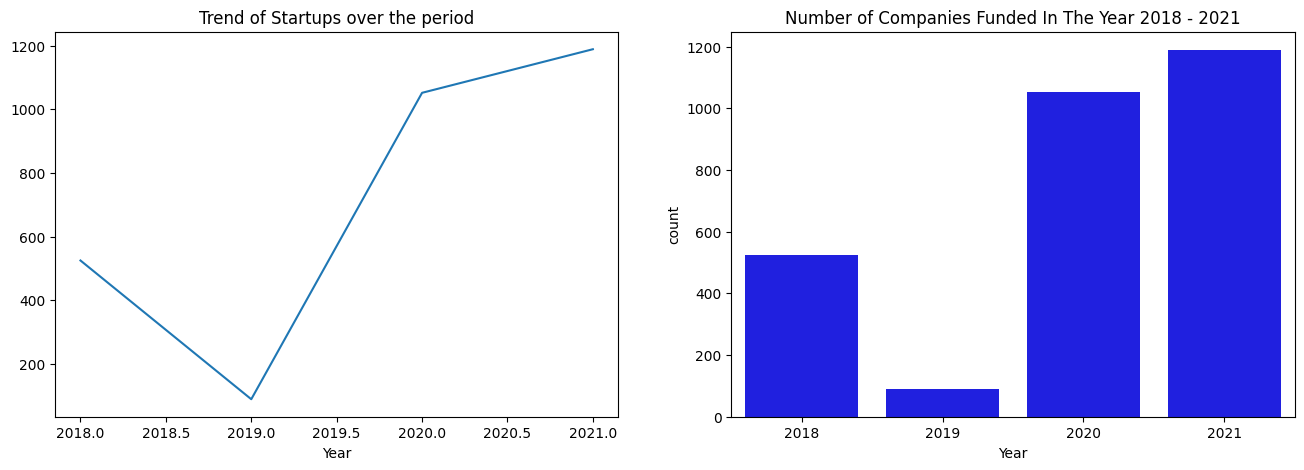

In [241]:
# Plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'blue'
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['Year'])['Company_Name'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# Plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='Year',  
    data = merged_data, 
    color = base_color)

plt.title('Number of Companies Funded In The Year 2018 - 2021')
plt.show()

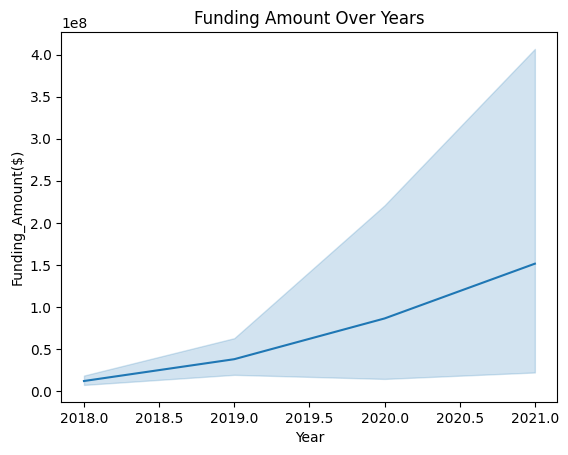

In [242]:
sns.lineplot(data = merged_data, x ='Year', y ='Funding_Amount($)')
plt.title('Funding Amount Over Years')
plt.show()

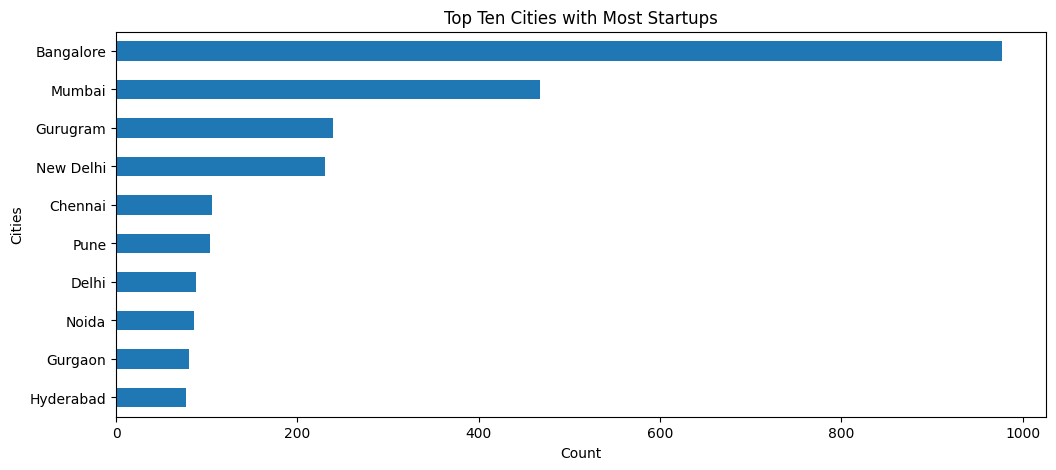

In [244]:
# Count the number of startups in each city
Top_Ten_loc = merged_data['Location'].value_counts().head(10).sort_values()

# Plot a horizontal bar chart to show the number of startups in each city
plt.figure(figsize = (12, 5))
Top_Ten_loc.plot(kind = 'barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

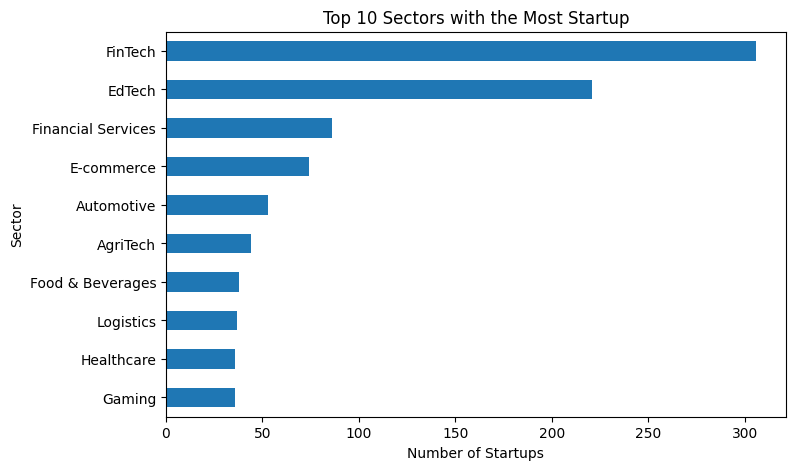

In [249]:
# check the top 10 cities with the most startups
Top_Ten_Sectors = merged_data['Sector'].value_counts().head(10)

# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize = (8, 5))
Top_Ten_Sectors.sort_values().plot(kind = 'barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

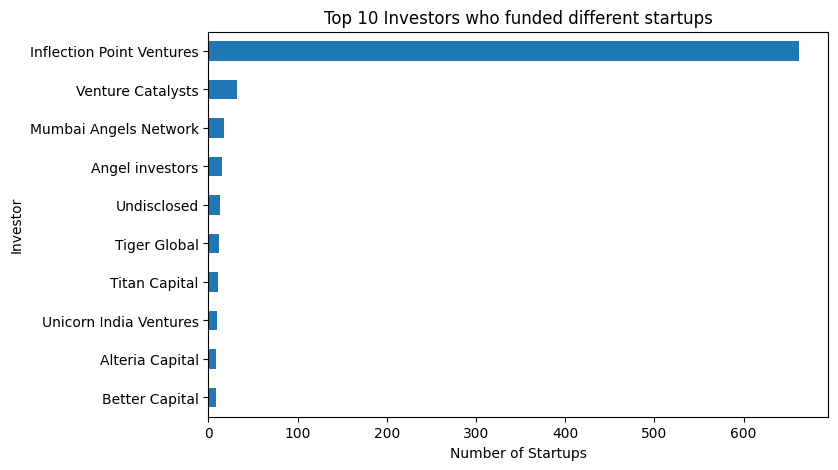

In [260]:
Top_Ten_Investors = merged_data['Investor'].value_counts().head(10)

# Plot a bar chart to show the top 10 investors with the most number of startups
plt.figure(figsize = (8, 5))
Top_Ten_Investors.sort_values().plot(kind = 'barh')
plt.title('Top 10 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

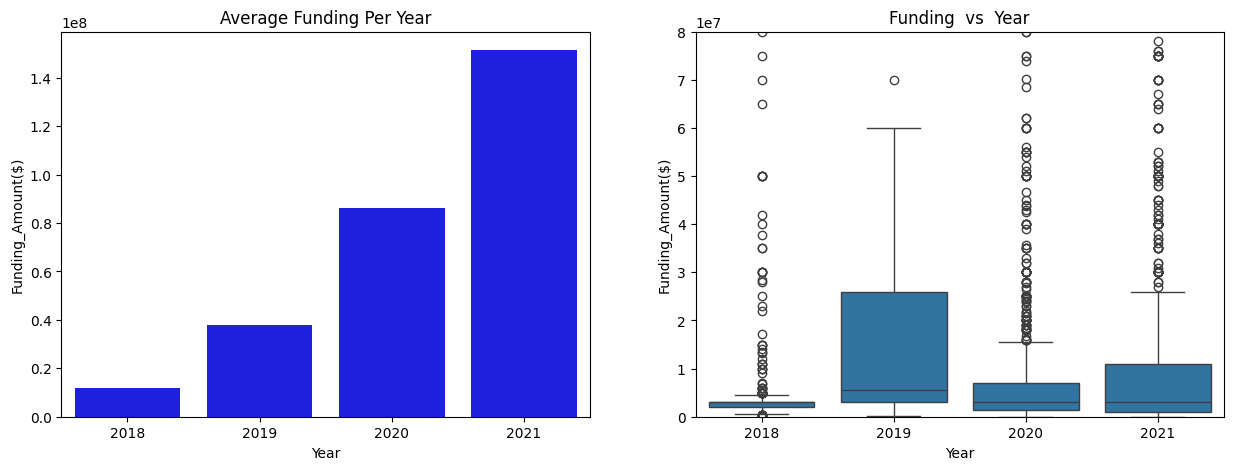

In [261]:
# Getting the Average(Mean) Funding Yearly
Average_Funding_Year = merged_data.groupby(['Year']).agg({'Funding_Amount($)': 'mean'})
Average_Funding_Year.reset_index(inplace = True)

# Print the average funding yearly

# Plot a bar chart to show the Avearge Funding Yearly
plt.figure(figsize = (15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data = Average_Funding_Year,
    x = 'Year',
    y = 'Funding_Amount($)',
    color = base_color)
plt.title('Average Funding Per Year')

# Plot a box plot to show the Avearge Funding Yearly
plt.subplot(1, 2, 2)
sns.boxplot(data = merged_data, y = 'Funding_Amount($)', x = 'Year')
plt.title('Funding  vs  Year');
plt.ylim(-10, 80000000);

### 3.3 Hypothesis Testing

Null Hypothesis (H0): There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

Alternative Hypothesis (H1): There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

In [263]:
import scipy.stats as stats

# Extract Funding Amounts for each Sector
Sector_Funding = [merged_data[merged_data['Sector'] == Sector]['Funding_Amount($)'] for Sector in merged_data['Sector'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*Sector_Funding)

alpha = 0.05

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Check for significance
if p_value < alpha:
    print("Reject Null Hypothesis. There is a significant difference in average funding amounts across sectors.")
else:
    print("Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.")

F-Statistic: 0.036108096661287135
P-Value: 0.9999999999999999
Fail to reject Null Hypothesis. There is no significant difference in average funding amounts across sectors.


#### 3.4 Analytical Questions

1. *Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.*

Text(0.5, 1.0, 'Size of Companies Funded In The Year 2018 - 2021')

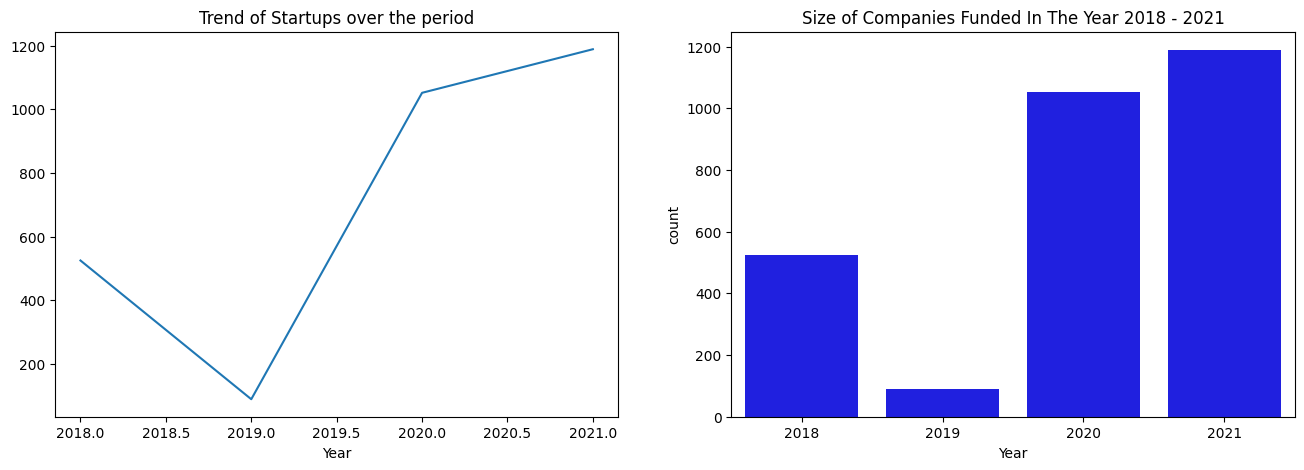

In [265]:
# Plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'blue'
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
Funding_Year_Count = merged_data.groupby(['Year'])['Company_Name'].count()
Funding_Year_Count.plot();
plt.title('Trend of Startups over the period')


# Plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x = 'Year',  
    data = merged_data, 
    color = base_color)
plt.title('Size of Companies Funded In The Year 2018 - 2021')

In [266]:
# Count the number of startup in each Funding Year
merged_data['Year'].value_counts()

Year
2021    1189
2020    1052
2018     525
2019      89
Name: count, dtype: int64

Observation:
 
Over the span of four years from 2018 to 2021, the data reflects a notable increase in the number of startups receiving funding. however, the notable dip in the number of startups funded in 2019, with only 89 startups receiving funding, may have been influenced by various real factors such as economic uncertainty associated with the outbreak of COVID-19 pandemic. That not withstanding, there is an indication economic rebound per the trend after 2019 which suggest suggests resilience and potential for growth in the startup ecosystem.

2. *Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime?* 

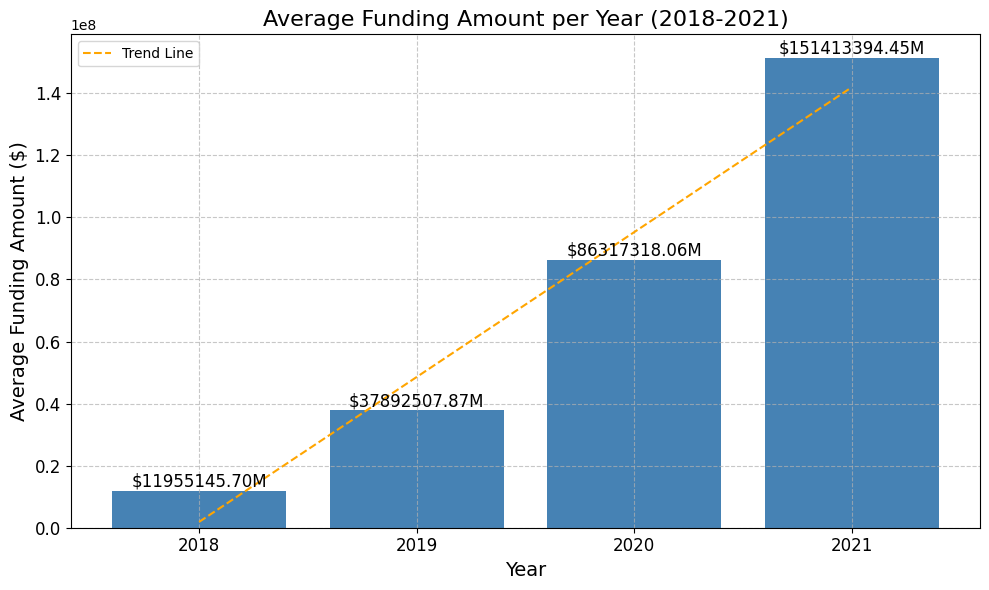

In [267]:
from scipy.stats import linregress

# Filter data for the years 2018 to 2021
Filtered_data = merged_data[(merged_data['Year'] >= 2018) & (merged_data['Year'] <= 2021)]

# Group data by year and calculate the average funding amount for each year
Average_Funding_per_Year = Filtered_data.groupby('Year')['Funding_Amount($)'].mean()

# Plotting
plt.figure(figsize = (10, 6))
bars = plt.bar(Average_Funding_per_Year.index, Average_Funding_per_Year.values, color = 'steelblue')

# Fit a linear regression line to the data points
slope, intercept, _, _, _ = linregress(Average_Funding_per_Year.index, Average_Funding_per_Year.values)
trend_line = slope * Average_Funding_per_Year.index + intercept

# Plot the trend line
plt.plot(Average_Funding_per_Year.index, trend_line, color = 'orange', linestyle = '--', label = 'Trend Line')

# Add labels and title
plt.title('Average Funding Amount per Year (2018-2021)', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Funding Amount ($)', fontsize = 14)
plt.xticks(Average_Funding_per_Year.index, fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.7)

# Add values on top of each bar with a slight offset for better visibility
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, "${:.2f}M".format(height), ha = 'center', va = 'bottom', fontsize = 12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

Observation

Over the four-year period from 2018 to 2021, the financial landscape for Indian startups has seen remarkable growth, as evidenced by a substantial increase in average funding amounts. Starting from $13.4 million in 2018 to an average funding amount surged of $151.3 million in 2021. This indicates growing investor confidence and a maturing startup ecosystem

3. *Identify the booming sectors withing the ecosystem and which top city serves as the industrial hub in India.*

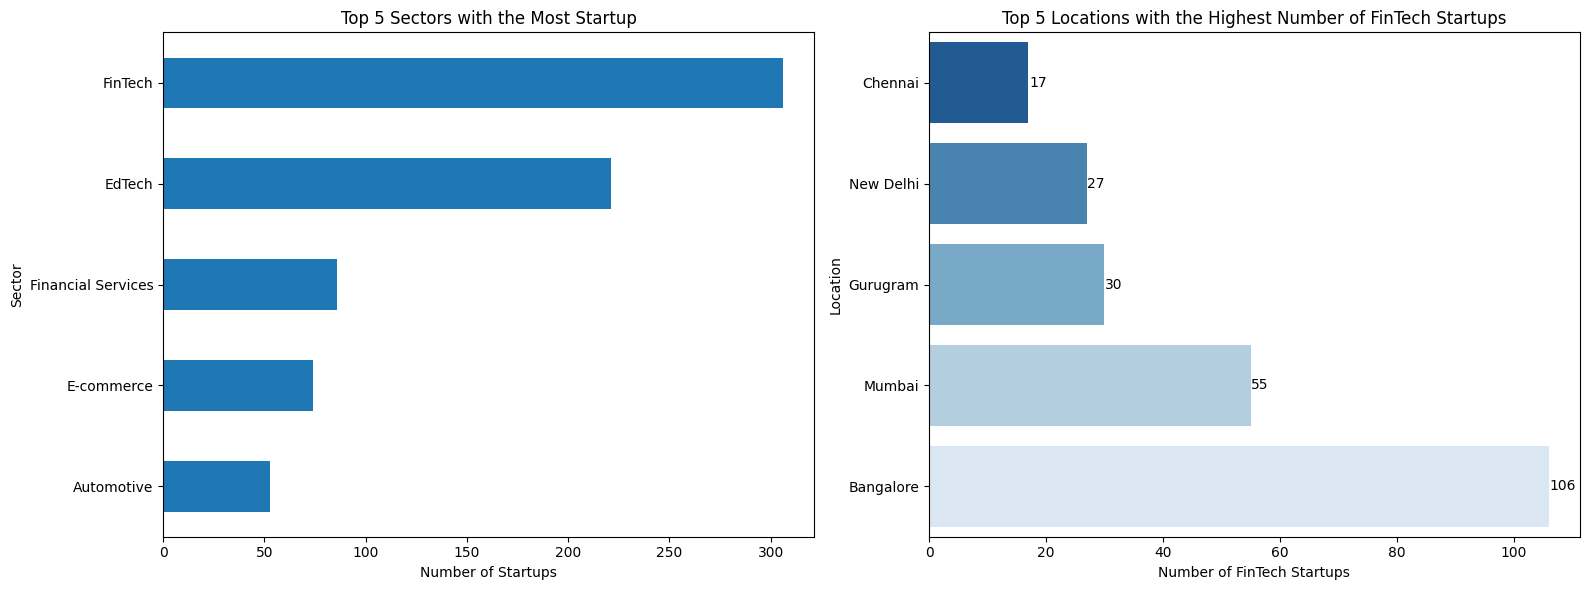

In [268]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize = (16, 6))

# Plot the Top 5 Sectors with the most startups
Top_five_sectors = merged_data['Sector'].value_counts().head(5)
Top_five_sectors.sort_values().plot(kind = 'barh', ax = axs[0])
axs[0].set_title('Top 5 Sectors with the Most Startup')
axs[0].set_xlabel('Number of Startups')
axs[0].set_ylabel('Sector')

# Filter data to include only startups in the FinTech sector
Fintech_Data = merged_data[merged_data['Sector'] == 'FinTech']

# Group data by location (city) and count the number of FinTech startups in each location
Fintech_startup_count_per_location = Fintech_Data['Location'].value_counts()

# Select the top 5 locations with the highest number of FinTech startups
Top_5_locations = Fintech_startup_count_per_location.head(5)

# Plotting the top 5 locations with the highest number of FinTech startups
sns.barplot(x = Top_5_locations.values, y = Top_5_locations.index, palette = 'Blues', ax = axs[1])

# Annotate the bars with count numbers
for i, count in enumerate(Top_5_locations.values):
    axs[1].text(count + 0.1, i, str(count), ha = 'left', va = 'center')

axs[1].set_title('Top 5 Locations with the Highest Number of FinTech Startups')
axs[1].set_xlabel('Number of FinTech Startups')
axs[1].set_ylabel('Location')
axs[1].invert_yaxis()  # Invert y-axis to display the highest count at the top

plt.tight_layout()
plt.show()

Observation

The findings reveal that the top booming sectors within the Indian startup ecosystem are FinTech, EdTech, Finance, E-Commerce, and SaaS, with FinTech leading the pack. Additionally, Bangalore emerges as the industrial hub in India, boasting the highest number of FinTech startups among the top cities, followed by Mumbai, Gurugram, New Delhi, and Chennai.
The dominance of FinTech reflects the growing importance of digital financial services, while EdTech's prominence indicates significant demand for technology-driven educational solutions.

4. *Determine the top investors within the startup ecosystem and identify the proportion of investment by the first 3 investors that have funded different sectors from 2018 - 2021* 

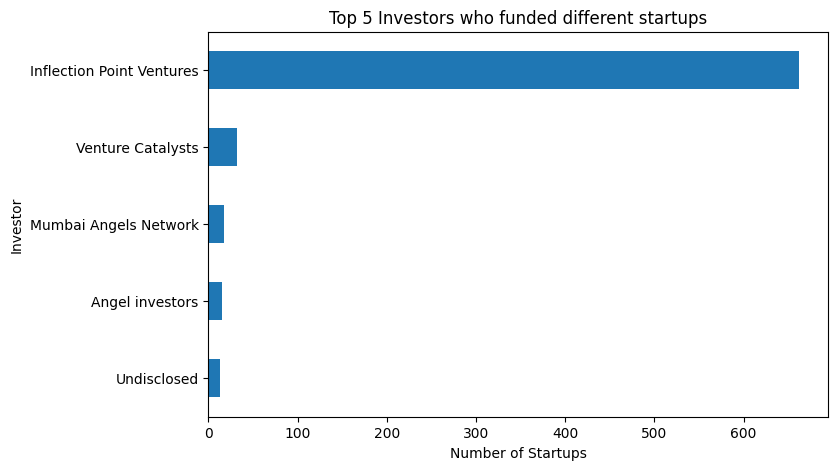

In [270]:
Top_5_Investors = merged_data['Investor'].value_counts().head(5)

# plot a bar chart to show the top 5 investors with the most number of startups
plt.figure(figsize = (8, 5))
Top_5_Investors.sort_values().plot(kind = 'barh')

plt.title('Top 5 Investors who funded different startups')
plt.xlabel('Number of Startups')
plt.ylabel('Investor');

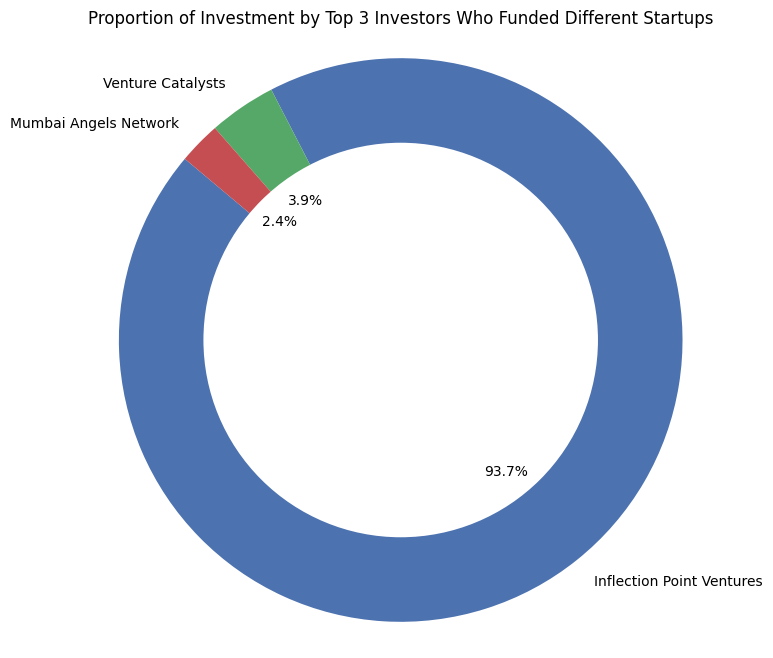

In [271]:
# Group data by Investor and count the number of unique startups funded by each investor
Investor_unique_startups = merged_data.groupby('Investor')['Company_Name'].nunique()

# Select the top 3 investors who funded the most different startups
Top_3_Investors = Investor_unique_startups.nlargest(3)

# Calculate the total number of unique startups funded by the top 3 investors
Total_unique_startups_top_3 = Top_3_Investors.sum()

# Calculate the proportion of investment made by each of the top 3 investors
proportion_top_3 = Top_3_Investors / Total_unique_startups_top_3

# Plotting
colors = ['#4c72b0', '#55a868', '#c44e52']  # Professional color palette
plt.figure(figsize = (8, 8))
plt.pie(proportion_top_3, labels = proportion_top_3.index, autopct = '%1.1f%%', startangle = 140, colors = colors)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of Investment by Top 3 Investors Who Funded Different Startups')
plt.axis('equal')
plt.show()

Observtion

The analysis identifies Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network as the top investors within the Indian startup ecosystem. These key players have funded multiple startups across diverse sectors from 2018 to 2021. Inflection Point Ventures stands out with the highest proportion of investment, followed by Venture Catalysts and Mumbai Angels Network. Their diverse investment portfolios reflect a strategic approach to spreading risk and capitalizing on opportunities across various sectors, contributing to the growth and innovation of the startup ecosystem

5. *Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.*

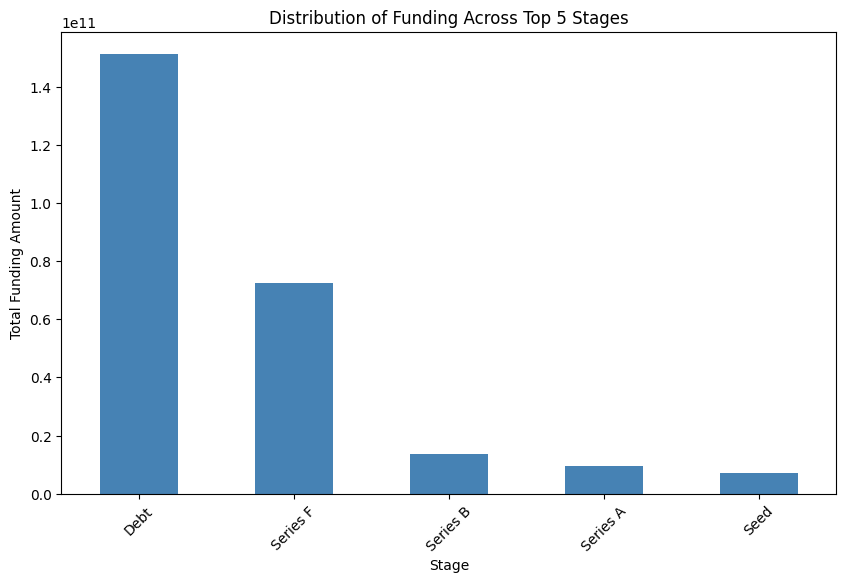

In [272]:
# Group data by stage and calculate the sum of funding amount for each stage
Stage_Funding = merged_data.groupby('Stage')['Funding_Amount($)'].sum()

# Select the top 5 stages with the highest total funding amounts
Top_5_Stages = Stage_Funding.nlargest(5)

# Plotting
plt.figure(figsize = (10, 6))
Top_5_Stages.plot(kind = 'bar', color = 'steelblue')
plt.title('Distribution of Funding Across Top 5 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation = 45)
plt.show()

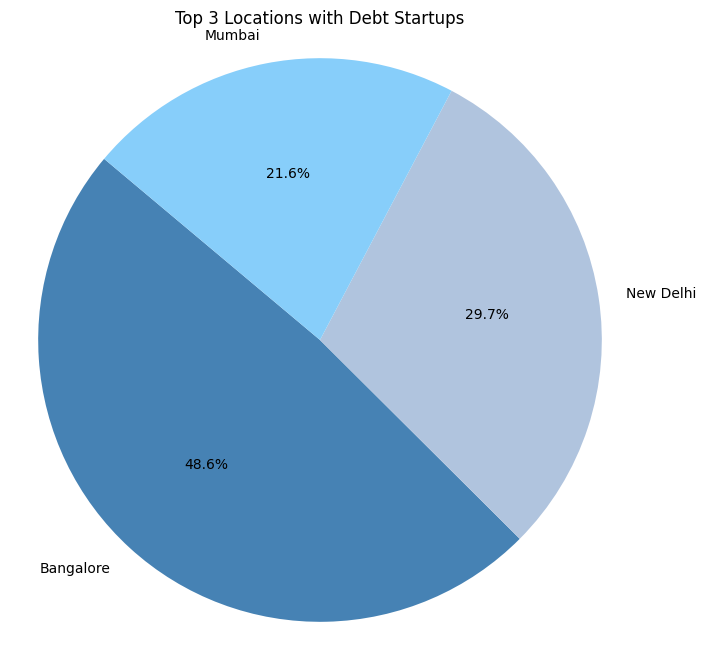

In [278]:
# Filter data for startups at the Series B stage
Debt_startups = merged_data[merged_data['Stage'] == 'Debt']

# Count the number of Series B startups in each location
Debt_startup_count_per_location = Debt_startups['Location'].value_counts().head(3)

# Plotting
plt.figure(figsize = (8, 8))
plt.pie(Debt_startup_count_per_location, labels = Debt_startup_count_per_location.index, autopct = '%1.1f%%', startangle = 140, colors = ['steelblue', 'lightsteelblue', 'lightskyblue'])
plt.title('Top 3 Locations with Debt Startups')
plt.axis('equal')

plt.show()

Observation

The top investors in the Indian startup ecosystem have shown a preference for funding businesses at various stages, with a notable focus on Debt investments. Debt funding is a strategic tool for startups looking to raise capital while retaining ownership and control. This method of raising capital has several potential benefits, especially when compared to equity financing, which involves selling shares of the company to investors. Bangalore emerges as the primary location for Debt startups, accounting for 48.6% of investments, followed by New Delhi at 29.7% and Mumbai at 21.6%.

#### **3.5 Recommendation**

Based on the observations on the Indian startup ecosystem, here are some informed recommendations for the team to consider to make informed decision:

1. **Stay Resilient and Adaptable:** The Indian startup ecosystem has shown resilience and potential for growth, even in the face of challenges like the economic uncertainty associated with the COVID-19 pandemic. The team should be prepared to navigate uncertainties and adapt strategies as needed.

2. **Focus on High-Growth Sectors:** The booming sectors within the Indian startup ecosystem, such as FinTech, EdTech, Finance, E-Commerce, and SaaS, present lucrative opportunities for investment and innovation. The team should consider these sectors to capitalize on the growing demand and investor interest.

3. **Location Strategy:** Bangalore emerges as the industrial hub in India, with a high concentration of startups, particularly in the FinTech sector. The team should consider establishing a presence in Bangalore to tap into the vibrant startup ecosystem and access talent, resources, and networking opportunities.

4. **Strategic Partnerships with Top Investors:** The team is encouraged to form strategic partnerships with top investors like Inflection Point Ventures, Venture Catalysts, and Mumbai Angels Network. These investors have a proven track record of funding successful startups across diverse sectors and can provide valuable insights, mentorship, funding opportunities.

5. **Focus on Debt Investments:** Given the preference of top investors for Debt investments, the team should consider targeting startups at this stage for investment or partnership opportunities. Debt Financed startups have typically proven their business model and are ready to scale, offering lower risk and significant growth potential.